## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

for i in [True, False]:
    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                                 monitor="val_loss", 
                                 save_best_only=True)
#儲存結果
    results = {}

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results = {'loss': train_loss, 'val_loss': valid_loss, 'acc':train_acc, 'val_acc':valid_acc}
    print(results)
    # Load back
    model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.4859 - acc: 0.8662 - val_loss: 1.7186 - val_acc: 0.4893
{'val_loss': [2.0568418258666994, 1.7738530319213868, 1.686812050819397, 1.6310832317352295, 1.5895702653884887, 1.5815311988830567, 1.5519948696136474, 1.540733590888977, 1.5170888456344604, 1.5008569602966308, 1.4927675405502319, 1.4847609964370727, 1.4897148880004882, 1.476177102470398, 1.4741335771560669, 1.4666423580169679, 1.4746072965621948, 1.46951005859375, 1.4640000610351562, 1.4734245651245117, 1.4679053115844727, 1.4637927373886108, 1.4545199691772461, 1.456868062400818, 1.4624334678649902, 1.4701132183074952, 1.4821875930786133, 1.477948476409912, 1.4843334459304809, 1.4979358749389649, 1.5005331254959107, 1.5142052841186524, 1.5064085092544555, 1.5186732383728028, 1.524093104171753, 1.5222485458374024, 1.54375948677063, 1.5787103172302246, 1.5635768899917601, 1.5797391750335694, 1.5909165077209473, 1.5890437366485595, 1.618521821784973,

50000/50000 [==============================] - 3s 61us/step - loss: 1.0831 - acc: 0.6318 - val_loss: 1.4563 - val_acc: 0.4923
Epoch 20/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0610 - acc: 0.6398 - val_loss: 1.4574 - val_acc: 0.4933
Epoch 21/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0393 - acc: 0.6505 - val_loss: 1.4614 - val_acc: 0.4986
Epoch 22/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0183 - acc: 0.6577 - val_loss: 1.4686 - val_acc: 0.4928
Epoch 23/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.9991 - acc: 0.6639 - val_loss: 1.4662 - val_acc: 0.4995
Epoch 24/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.9776 - acc: 0.6722 - val_loss: 1.4626 - val_acc: 0.5023
Epoch 25/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9556 - acc: 0.6798 - val_loss: 1.4756 - val_acc: 0.4986
Epoch 26/50
50000/50000 [=====================

10000/10000 [==============================] - 1s 102us/step


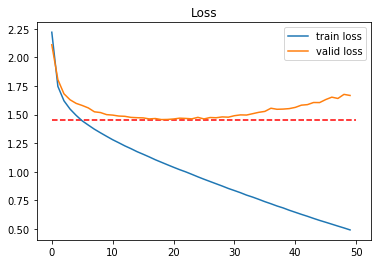

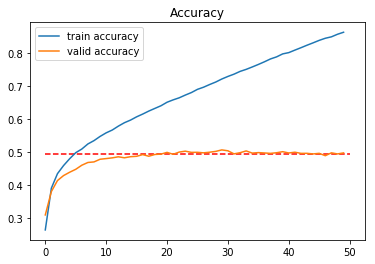

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()